<h1 style="font-size:30px;">Preparing the data</h1>

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [251]:
from sklearn.datasets import make_blobs

In [252]:
data = make_blobs(n_samples = 300, n_features = 2, centers = 2, cluster_std = 1.0 , random_state = 101) #centers=2: number of clusters

In [253]:
x, y = data #data[0] = features = x    #data[1] = labels = y

In [254]:
#now, the Noise:

np.random.seed(seed = 101)
z_noise = np.random.normal(size = len(x))
z_noise = pd.Series(z_noise)

In [255]:
# z_noise

In [256]:
feature = pd.DataFrame(x)

In [257]:
# feature

In [258]:
feature = pd.concat([feature, z_noise], axis = 1)

In [259]:
feature.columns = ['x1', 'x2', 'x3']

In [260]:
feature

,x1,x2,x3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118
...,...,...,...
295,1.320546,2.605592,1.523750
296,-8.043916,-6.010589,1.290230
297,-9.733566,-7.460380,-1.478319
298,-10.722075,-5.568565,0.214234



<h1 style="font-size:30px;">Visualising the data</h1>

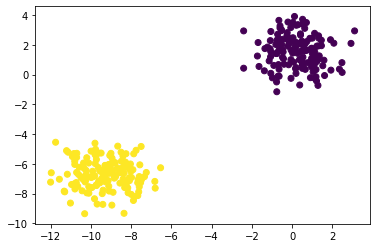

In [261]:
plt.scatter(feature['x1'], feature['x2'], c = y) #c=y: just for the color

In [262]:
#now, we want to plot this in 3D:

from mpl_toolkits.mplot3d import Axes3D

In [263]:
#an interactive environment for plots!

%matplotlib notebook 

<IPython.core.display.Javascript object>


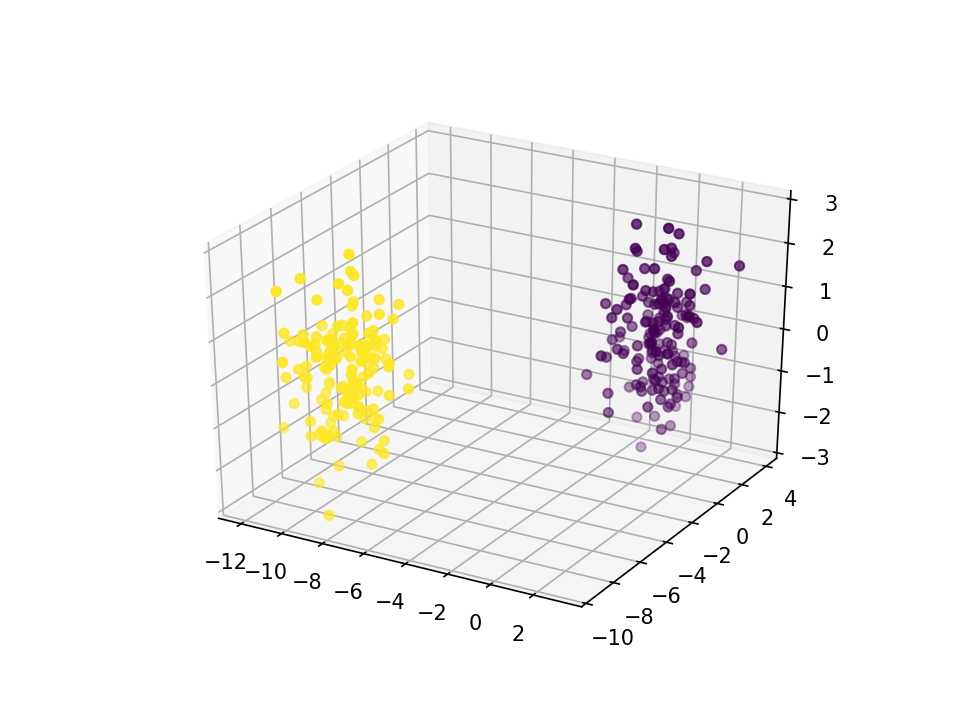

In [264]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(feature['x1'], feature['x2'], feature['x3'], c=y)

In [ ]:
#so if we use Autoencoder, we expect that 'x1' and 'x2' are chosen as important features by the hidden layer, but 'x3' is not since it is the noise that we added.


<h1 style="font-size:30px;">Model</h1>

In [265]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import SGD #SGD: optomizer is SGD (stochastic gradient decsent) #SGD also modifies the learning rate, so if we see that the hidden layer has some problems, then we can change its rate.

#3 ---> 2 ---> 3

encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3])) #input_shape=[3]: input has 3 notes #units=2: has 

In [266]:
decoder = Sequential()
decoder.add(Dense(units = 3, activation='relu', input_shape=[2]))

In [267]:
autoencoder = Sequential([encoder, decoder]) #adding two stacks of layers(actually 3 layes!)

In [268]:
autoencoder.compile(loss = 'mse', optimizer = SGD(lr=1.5)) #loss = 'mse': since we have continuous values  #optimizer='adam': this can be too.


<h1 style="font-size:30px;">Scaling the data (=dimensiallity reduction)</h1>



In [269]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feature)

In [270]:
#so in Autoencoder (=unsupervised learning) we don't use "train_test_split" becsause there are no labels and correct answeres, so it doesn't make sense to use that method!

In [271]:
autoencoder.fit(x = scaled_data, y = scaled_data, epochs = 5) #so in Autoencoder (=unsupervised learning) both x and y are our data (better: scaled data!)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 1s 3ms/sample - loss: 0.2094
Epoch 2/5
300/300 [==============================] - 0s 130us/sample - loss: 0.1593
Epoch 3/5
300/300 [==============================] - 0s 117us/sample - loss: 0.1528
Epoch 4/5
300/300 [==============================] - 0s 103us/sample - loss: 0.1431
Epoch 5/5
300/300 [==============================] - 0s 111us/sample - loss: 0.1379


<h1 style="font-size:30px;">Predicting the data</h1>

In [272]:
encoded_2d = encoder.predict(scaled_data)

In [273]:
encoded_2d

array([[0.00000000e+00, 6.25655591e-01],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.84823823e-01],
       [0.00000000e+00, 5.62882543e-01],
       [0.00000000e+00, 4.31110859e-01],
       [1.99259639e-01, 0.00000000e+00],
       [0.00000000e+00, 5.32586813e-01],
       [3.13827217e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.45149899e-01],
       [0.00000000e+00, 4.54170853e-01],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.54563326e-01],
       [2.16561407e-01, 0.00000000e+00],
       [0.00000000e+00, 4.66059953e-01],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.66216218e-02],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.02523184e-01],
       [0.00000000e+00, 0.00000000e+00],
       [2.81661093e-01, 0.00000000e+00],
       [0.00000000e+00, 3.89017344e-01],
       [0.000000

In [274]:
encoded_2d.shape

(300, 2)

In [275]:
scaled_data.shape

(300, 3)

In [276]:
#so, we have successfully reduced the dimensialty of our dataset from 3D to 2D!

<IPython.core.display.Javascript object>


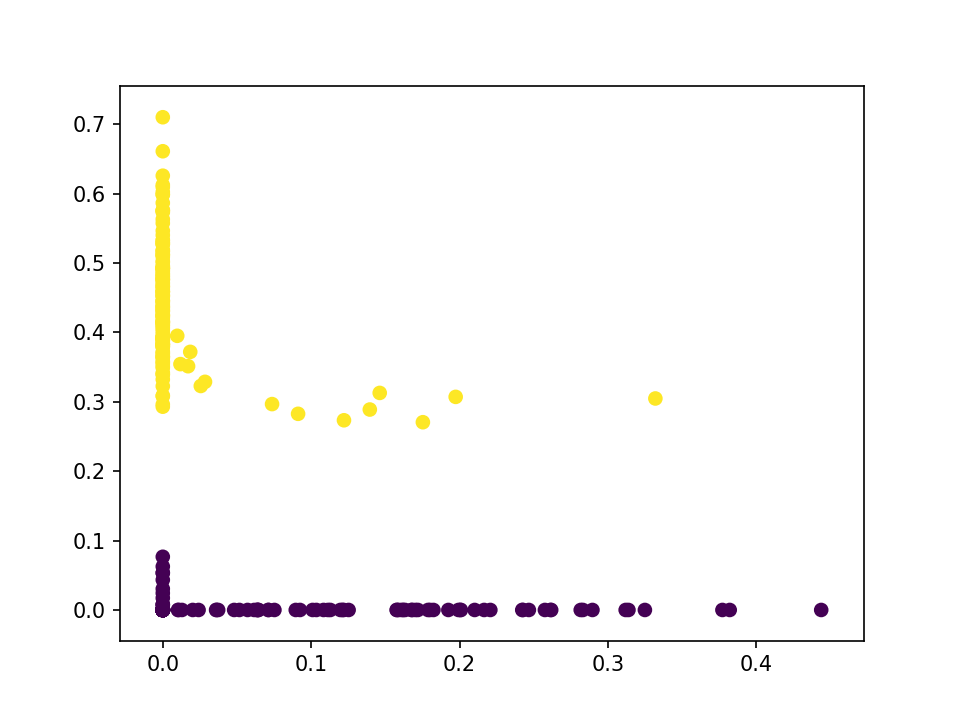

In [277]:
%matplotlib notebook
plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], c=y)